In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
print("setup complete")

df = pd.read_csv("final_depression_dataset_1.csv")
df["suicidal_thoughts"] = df["Have you ever had suicidal thoughts ?"]
df.drop(columns=["Have you ever had suicidal thoughts ?"], inplace=True)
head = df.head(2000)
# Sometimes, it needs encoding to work
# LABELISATION
le = LabelEncoder()
head['Working_Professional_or_Student_encoded'] = le.fit_transform(head['Working Professional or Student'])
head['Profession_encoded'] = le.fit_transform(head['Profession'])
head['Sleep_Duration_encoded'] = le.fit_transform(head['Sleep Duration'])
head['Dietary_Habits_encoded'] = le.fit_transform(head['Dietary Habits'])
head['Degree_encoded'] = le.fit_transform(head['Degree'])
head['City_encoded'] = le.fit_transform(head['City'])
head['Gender_encoded'] = le.fit_transform(head['Gender'])
head['Family_history_encoded'] = le.fit_transform(head['Family History of Mental Illness'])
head['Depression_encoded'] = le.fit_transform(head['Depression'])
head['suicidal_thoughts_encoded'] = le.fit_transform(head['suicidal_thoughts'])
copy = head.copy()
head = head.drop(columns=['Name','suicidal_thoughts', 'Depression','Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'City', 'Gender', 'Family History of Mental Illness'])
# NULL VALUES
head['Academic Pressure'] = head['Academic Pressure'].fillna(head['Academic Pressure'].median())
head['CGPA'] = head['CGPA'].fillna(head['CGPA'].median())
head['Study Satisfaction'] = head['Study Satisfaction'].fillna(head['Study Satisfaction'].median())
head['Job Satisfaction'] = head['Job Satisfaction'].fillna(head['Job Satisfaction'].median())
head['Work Pressure'] = head['Work Pressure'].fillna(head['Work Pressure'].median())
print("Preprocessing complete")
display(head)

setup complete
Preprocessing complete


C:\Users\pierr\AppData\Local\Temp\ipykernel_5148\1772215747.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head['Working_Professional_or_Student_encoded'] = le.fit_transform(head['Working Professional or Student'])
C:\Users\pierr\AppData\Local\Temp\ipykernel_5148\1772215747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head['Profession_encoded'] = le.fit_transform(head['Profession'])
C:\Users\pierr\AppData\Local\Temp\ipykernel_5148\1772215747.py:16: SettingWithCopyWarning: 
A value is trying to

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Working_Professional_or_Student_encoded,Profession_encoded,Sleep_Duration_encoded,Dietary_Habits_encoded,Degree_encoded,City_encoded,Gender_encoded,Family_history_encoded,Depression_encoded,suicidal_thoughts_encoded
0,37,3.0,2.0,7.735,3.0,4.0,6,2,1,32,1,1,18,7,0,0,0,0
1,60,3.0,4.0,7.735,3.0,3.0,0,4,1,16,0,2,1,11,1,1,0,1
2,42,3.0,2.0,7.735,3.0,3.0,0,2,1,32,0,1,14,3,0,0,0,0
3,44,3.0,3.0,7.735,3.0,5.0,1,2,1,32,1,0,22,25,0,1,0,1
4,48,3.0,4.0,7.735,3.0,3.0,6,5,1,34,1,1,8,9,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,42,3.0,1.0,7.735,3.0,5.0,8,3,1,15,3,1,21,25,1,1,0,1
1996,31,5.0,3.0,5.720,2.0,3.0,10,5,0,35,3,2,11,20,1,1,1,0
1997,30,3.0,1.0,7.735,3.0,2.0,8,1,1,17,0,1,10,24,1,0,0,0
1998,58,3.0,3.0,7.735,3.0,2.0,9,5,1,2,1,1,19,16,1,0,0,0


### Histplot

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

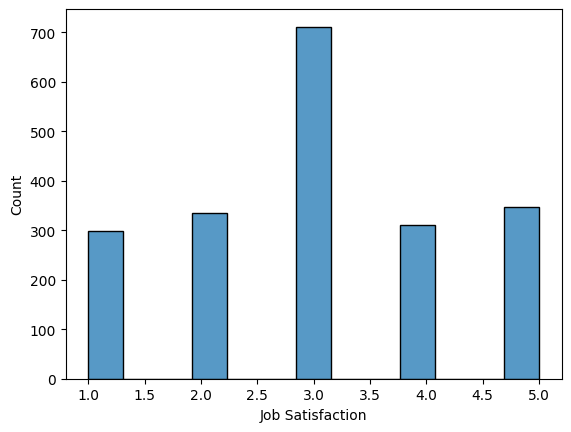

In [8]:
sns.histplot(head['Job Satisfaction'])

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

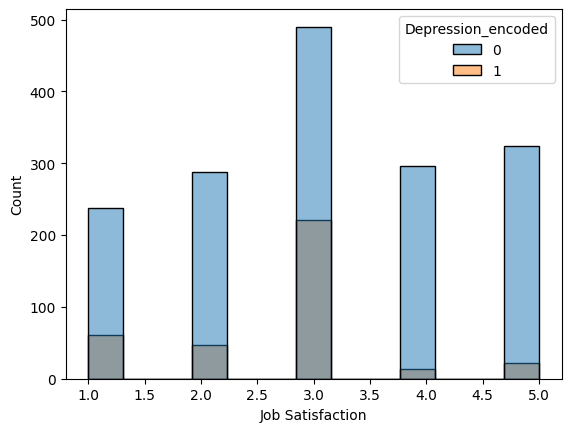

In [14]:
sns.histplot(data=head, x='Job Satisfaction', hue='Depression_encoded')

### Density plots

C:\Users\pierr\AppData\Local\Temp\ipykernel_5148\1262068885.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=head['Job Satisfaction'], shade=True)


<Axes: xlabel='Job Satisfaction', ylabel='Density'>

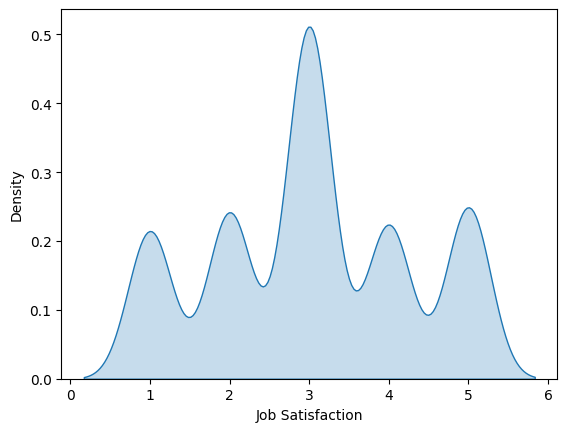

In [11]:
sns.kdeplot(data=head['Job Satisfaction'], shade=True)

### 2D KDE plots

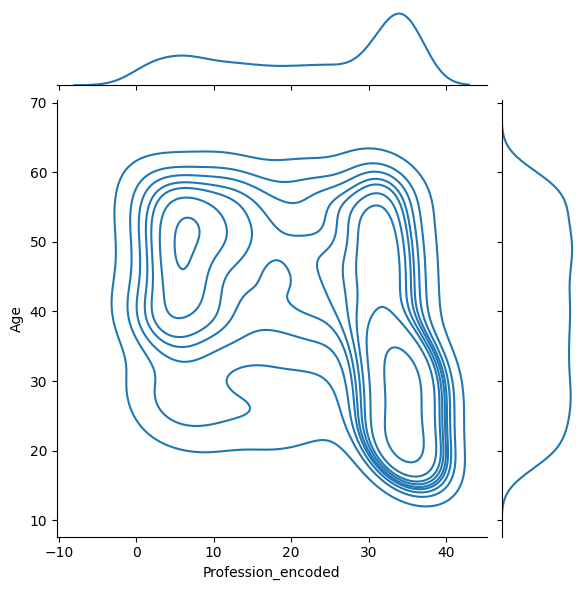

In [6]:
sns.jointplot(x=head['Profession_encoded'], y=head['Age'], kind="kde")